In [411]:
from sklearn import model_selection, metrics, linear_model
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [412]:
raw_data_frame = pd.read_csv("bike_sharing_demand.csv", header=0, sep=',')

In [413]:
raw_data_frame

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [414]:
raw_data_frame.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [415]:
raw_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [416]:
raw_data_frame.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [417]:
raw_data_frame.isnull().values.any()

False

In [418]:
raw_data_frame.datetime = raw_data_frame.datetime.apply(pd.to_datetime)

In [419]:
raw_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [420]:
raw_data_frame["month"] = raw_data_frame.datetime.apply(lambda x : x.month)

In [421]:
raw_data_frame["hour"] = raw_data_frame.datetime.apply(lambda x : x.hour)

In [422]:
raw_data_frame.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


In [423]:
train_data = raw_data_frame.iloc[:-1000]

In [424]:
test_data = raw_data_frame.iloc[-1000:]

In [425]:
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
9886,2012-10-16 07:00:00,4,0,1,1,17.22,21.210,67,6.0032,20,505,525,10,7
9887,2012-10-16 08:00:00,4,0,1,1,18.04,21.970,62,0.0000,35,800,835,10,8
9888,2012-10-16 09:00:00,4,0,1,1,19.68,23.485,55,16.9979,32,323,355,10,9
9889,2012-10-16 10:00:00,4,0,1,1,20.50,24.240,48,19.0012,65,157,222,10,10
9890,2012-10-16 11:00:00,4,0,1,1,20.50,24.240,45,27.9993,56,172,228,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,22


In [426]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,2012-10-16 02:00:00,4,0,1,1,18.04,21.970,67,8.9981,2,1,3,10,2
9882,2012-10-16 03:00:00,4,0,1,1,17.22,21.210,67,7.0015,0,2,2,10,3
9883,2012-10-16 04:00:00,4,0,1,1,17.22,21.210,67,11.0014,0,7,7,10,4
9884,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52,10,5


In [427]:
print(raw_data_frame.shape, test_data.shape, train_data.shape)

(10886, 14) (1000, 14) (9886, 14)


In [428]:
print(f'Train period from {train_data.datetime.min()} to {train_data.datetime.max()}')

Train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00


In [429]:
print(f'Test period from {test_data.datetime.min()} to {test_data.datetime.max()}')

Test period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


In [430]:
train_labels = train_data["count"].values

In [431]:
train_data = train_data.drop(["datetime", "count"], axis=1)

In [432]:
test_labels = test_data["count"].values

In [433]:
test_data = test_data.drop(["datetime", "count"], axis=1)

Text(0.5, 1.0, 'Test labels')

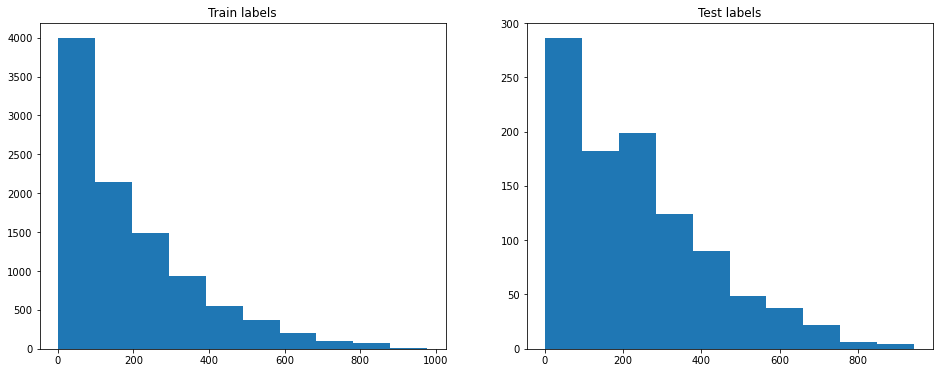

In [434]:
pylab.figure(figsize = (16, 6))
pylab.subplot(1, 2, 1)
pylab.hist(train_labels)
pylab.title("Train labels")


pylab.subplot(1, 2, 2)
pylab.hist(test_labels)
pylab.title("Test labels")



In [435]:
numerical_attributes = ["temp", "atemp", "windspeed", "humidity", "casual", "registered", "month", "hour"]

In [436]:
train_data = train_data[numerical_attributes]

In [437]:
test_data = test_data[numerical_attributes]

In [438]:
train_data.head()

,temp,atemp,windspeed,humidity,casual,registered,month,hour
0,9.84,14.395,0.0,81,3,13,1,0
1,9.02,13.635,0.0,80,8,32,1,1
2,9.02,13.635,0.0,80,5,27,1,2
3,9.84,14.395,0.0,75,3,10,1,3
4,9.84,14.395,0.0,75,0,1,1,4


In [439]:
regressor = linear_model.SGDRegressor()

In [440]:
regressor.fit(train_data, train_labels)

SGDRegressor()

In [441]:
metrics.mean_absolute_error(test_labels, regressor.predict(test_data))

1777962523906.7415

In [442]:
print(test_labels[-10:])

[218 237 334 562 569 336 241 168 129  88]


In [443]:
print(regressor.predict(test_data)[-10:])

[-1.22811511e+12 -1.17646084e+12 -1.85589218e+12 -3.12722336e+12
 -3.13895360e+12 -1.32622068e+12 -1.01438099e+12 -5.41542222e+11
 -4.02685937e+11 -7.94442083e+10]


In [444]:
from sklearn.preprocessing import StandardScaler

In [445]:
scaler = StandardScaler()

In [446]:
scaler.fit(train_data, train_labels)

StandardScaler()

In [447]:
scaled_train_data = scaler.transform(train_data)

In [448]:
scaled_test_data = scaler.transform(test_data)

In [449]:
regressor.fit(scaled_train_data, train_labels)

SGDRegressor()

In [450]:
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

0.014476530121369706

In [451]:
print(test_labels[-10:])


[218 237 334 562 569 336 241 168 129  88]


In [452]:
train_data.head()

,temp,atemp,windspeed,humidity,casual,registered,month,hour
0,9.84,14.395,0.0,81,3,13,1,0
1,9.02,13.635,0.0,80,8,32,1,1
2,9.02,13.635,0.0,80,5,27,1,2
3,9.84,14.395,0.0,75,3,10,1,3
4,9.84,14.395,0.0,75,0,1,1,4


In [453]:
print(regressor.predict(scaled_test_data)[-10:]) #слишком хорошие значения(ошибка меньше чем в 1 велосипед)

[218.00681786 237.00663205 333.99733354 561.96782764 568.96692165
 335.99740543 240.99683893 168.00136359 129.01412875  88.01947652]


In [454]:
#из-за того, что во входных данных есть 2 признака, сумма которых является целевым признаком.

In [455]:
train_data.drop(["casual", "registered"], axis=1, inplace=True)
test_data.drop(["casual", "registered"], axis=1, inplace=True)

In [456]:
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [457]:
metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 6)